In [ ]:
# default_exp oneDim

In [ ]:
#hide
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# oneDim
> Code for a 1-D problem.

In [ ]:
#hide
from nbdev.showdoc import *

# 1 dimensional case (ODE)

We consider the following 1-D problem:

$$-\frac{d}{dx}\left(p(x)\frac{du(x)}{dx}\right)=f(x) \hspace{0.5cm}\forall x\in[0,1]$$

$$u(0)=u(1)=0$$

where here $f$ is a random forcing term, assumed to be a GP in this work. 

## Variational formulation

The variational formulation is given by:

$$a(u,v)=L(v)$$

where:

$$a(u,v)=\int_{0}^{1}pu^{\prime}v^{\prime}dx$$

and

$$L(v)=\int_{0}^{1}fvdx$$

We will make the following choices for $p,f$:

$$p(x)=1$$

$$f\sim\mathcal{G}\mathcal{P}(\bar{f},k_{f})$$

$$\bar{f}(x)=1$$

$$ k_{f}(x,y) = \sigma_f^{2}\exp\left(-\frac{|x-y|^2}{2l_f^2}\right)$$

$$ \sigma_{f} = 0.1$$

$$ l_f = 0.4 $$

## Difference between true mean and FEM mean

Since the mean of $f$ is $\bar{f}(x)=1$ we have that the true mean of the solution $u$ is the solution of the ODE with forcing term set to the constant function 1. This has the exact analytic solution:

$$u(x)=\frac{1}{2}x(1-x)$$

as can be directly verified.

The FEM approximation to the solution distribution has mean $\boldsymbol{\Phi}(x)^{*}A^{-1}\bar{F}$ which is the solution to the approximate variational problem obtained by replacing $f$ with $\bar{f}$ in the linear form $L$. 

We will utilise FEniCS to compute the error between these two as a function of $h$ the mesh size. To do this we first create a function `mean_assembler` which will assemble the mean for the FEM prior

In [ ]:
#export
from dolfin import *
import numpy as np
from scipy import integrate
from scipy.spatial.distance import cdist
from scipy.linalg import sqrtm
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from scipy.interpolate import interp1d
from joblib import Parallel, delayed
import multiprocessing

# code to assemble the mean for a given mesh size
def mean_assembler(h,f_bar):
    "This function assembles the mean for the FEM prior for our 1-D problem"
    # get size of the grid
    J = int(np.round(1/h))
    
    # set up the mesh and function space for FEM
    mesh = UnitIntervalMesh(J)
    V = FunctionSpace(mesh,'Lagrange',1)
    
    # set up boundary conditiond
    def boundary(x, on_boundary):
        return on_boundary
    
    bc = DirichletBC(V, 0.0, boundary)
    # set up the functions p and f
    p = Constant(1.0)
    f = f_bar
    
    # set up the bilinear form for the variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = inner(p*grad(u),grad(v))*dx
    
    # set up the linear form
    L = f*v*dx
    
    # solve the variational problem
    μ = Function(V)
    solve(a == L, μ, bc)
    
    return μ

`mean_assembler` takes in the mesh size `h` and the mean function `f_bar` for the forcing and computes the mean of the approximate FEM prior, returning this as a FEniCS function.

> Important: `mean_assembler` requires `f_bar` to be represented as a FEniCS function/expression/constant.

Let's check that this is working:

In [ ]:
h = 0.15
f_bar = Constant(1.0)
μ = mean_assembler(h,f_bar)
μ

In [ ]:
# check the type of μ
assert type(μ) == function.function.Function

As explained above the true mean is the function $u(x)=\frac{1}{2}x(1-x)$. Let's check that the approximate mean resembles this by plotting both:

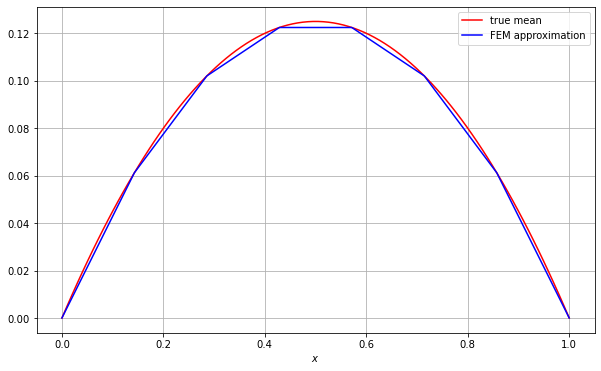

In [ ]:
#hide_input
# use FEniCS to plot μ
x = np.linspace(0,1,100)
μ_true = 0.5*x*(1-x)
plt.plot(x,μ_true,label='true mean',color='red')
plot(μ,label='FEM approximation',color='blue')
plt.legend()
plt.xlabel(r'$x$')
plt.grid()
plt.show()

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_oneDim.ipynb.
Converted index.ipynb.
